In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Read csv into a DataFrame
wellness_df = pd.read_csv("../Resources/Wellbeing_and_lifestyle_data_Kaggle.csv")
wellness_df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,2015-07-07,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,2015-07-07,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,2015-07-07,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,2015-07-07,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,2015-07-07,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15966,2021-03-14 05:42:00,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15967,2021-03-14 06:30:00,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15968,2021-03-14 08:35:00,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15969,2021-03-14 08:43:00,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


In [3]:
# Convert Timestamp to Date Time format 
wellness_df["Timestamp"] = pd.to_datetime(wellness_df["Timestamp"], format='ISO8601')

In [4]:
wellness_df["DAILY_STRESS_ADJ"] = wellness_df["DAILY_STRESS"] * 2

In [5]:
wellness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15971 entries, 0 to 15970
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                15971 non-null  datetime64[ns]
 1   FRUITS_VEGGIES           15971 non-null  int64         
 2   DAILY_STRESS             15971 non-null  int64         
 3   PLACES_VISITED           15971 non-null  int64         
 4   CORE_CIRCLE              15971 non-null  int64         
 5   SUPPORTING_OTHERS        15971 non-null  int64         
 6   SOCIAL_NETWORK           15971 non-null  int64         
 7   ACHIEVEMENT              15971 non-null  int64         
 8   DONATION                 15971 non-null  int64         
 9   BMI_RANGE                15971 non-null  int64         
 10  TODO_COMPLETED           15971 non-null  int64         
 11  FLOW                     15971 non-null  int64         
 12  DAILY_STEPS              15971 n

In [6]:
# DataFrame to show if sleep has any relationship with daily stress, daily steps, social network, supporting others
sleep_df = wellness_df[["Timestamp", "SLEEP_HOURS", "DAILY_STRESS_ADJ", "DAILY_STEPS", "SOCIAL_NETWORK", "SUPPORTING_OTHERS"]]
sleep_df.head()

,Timestamp,SLEEP_HOURS,DAILY_STRESS_ADJ,DAILY_STEPS,SOCIAL_NETWORK,SUPPORTING_OTHERS
0,2015-07-07,7,4,5,5,0
1,2015-07-07,8,6,5,10,8
2,2015-07-07,8,6,4,10,4
3,2015-07-07,5,6,5,7,10
4,2015-07-07,7,2,5,4,10


In [7]:
sleep_df_time = sleep_df.set_index("Timestamp")

In [8]:
sleep_df_time

,SLEEP_HOURS,DAILY_STRESS_ADJ,DAILY_STEPS,SOCIAL_NETWORK,SUPPORTING_OTHERS
Timestamp,,,,,
2015-07-07 00:00:00,7,4,5,5,0
2015-07-07 00:00:00,8,6,5,10,8
2015-07-07 00:00:00,8,6,4,10,4
2015-07-07 00:00:00,5,6,5,7,10
2015-07-07 00:00:00,7,2,5,4,10
...,...,...,...,...,...
2021-03-14 05:42:00,7,6,10,10,0
2021-03-14 06:30:00,6,6,6,4,7
2021-03-14 08:35:00,7,6,5,8,10


In [9]:
sum_by_year = sleep_df_time.groupby(sleep_df_time.index.year).sum()

In [10]:
sum_by_year

,SLEEP_HOURS,DAILY_STRESS_ADJ,DAILY_STEPS,SOCIAL_NETWORK,SUPPORTING_OTHERS
Timestamp,,,,,
2015,14427,11050,11027,13206,11340
2016,23435,18866,18357,21577,17983
2017,19476,15260,15564,18118,15691
2018,13660,10552,11746,13201,11194
2019,15576,12664,13229,14323,12322
2020,23259,18640,19018,20756,18927
2021,2650,2140,2151,2216,2239


<Axes: xlabel='Timestamp'>

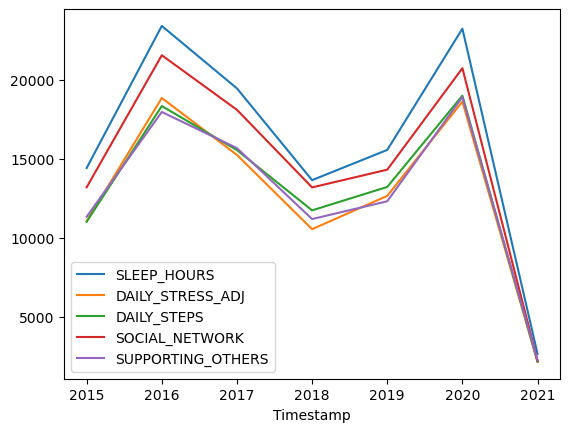

In [11]:
sum_by_year.plot()

In [12]:
sum_by_month = sleep_df_time.groupby(sleep_df_time.index.month).sum()
sum_by_month

,SLEEP_HOURS,DAILY_STRESS_ADJ,DAILY_STEPS,SOCIAL_NETWORK,SUPPORTING_OTHERS
Timestamp,,,,,
1,7922,6340,6386,7303,6367
2,9536,7478,7907,8844,7511
3,10265,8368,8108,9739,7883
4,7778,6276,6356,6986,6066
5,8932,6778,7203,8060,7046
6,6721,5380,5570,5697,5444
7,9279,7312,7585,8575,7670
8,11043,8434,9012,9921,8566
9,12056,9670,10066,11578,9890


In [14]:
mean_scores_over_time = sleep_df_time.resample('Q')[["SLEEP_HOURS", "DAILY_STRESS_ADJ"]].mean()
mean_scores_over_time

,SLEEP_HOURS,DAILY_STRESS_ADJ
Timestamp,,
2015-09-30,7.159715,5.338759
2015-12-31,7.173786,5.633010
2016-03-31,7.029488,5.715525
2016-06-30,7.067961,5.597087
2016-09-30,7.000000,5.818182
2016-12-31,7.064729,5.558785
2017-03-31,7.015590,5.371938
2017-06-30,7.092233,5.495146
2017-09-30,6.964684,5.397770


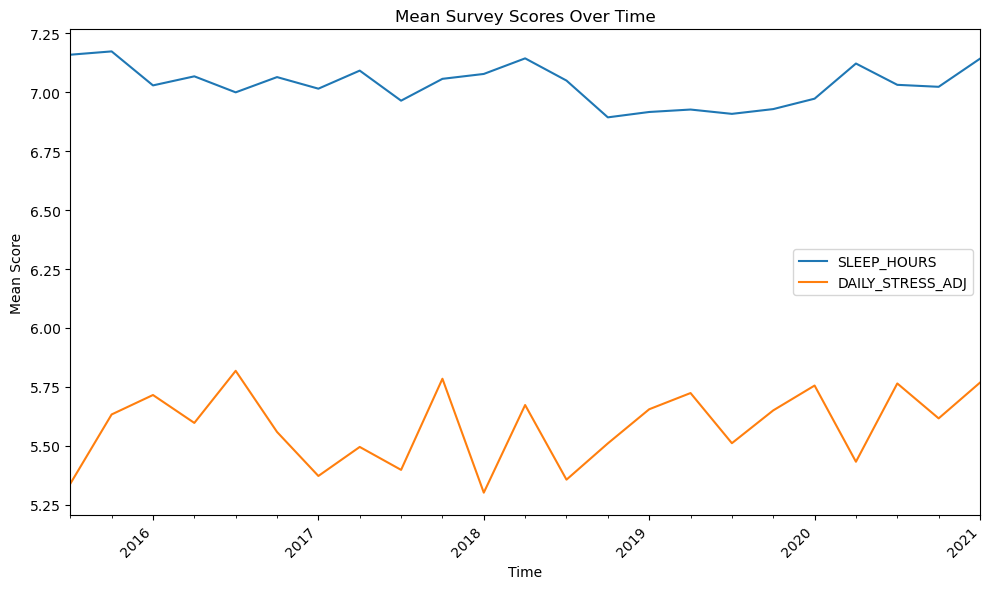

In [15]:
# Shows impact of sleep to daily stress. There is a small delay between the two. As average sleep decreases you'll
# notice a increase in average daily stress and vice versa, as average sleep starts to climb you'll notice that 
# there is a decrease in daily stress. 
mean_scores_over_time.plot(kind='line', figsize=(10, 6))
years = mean_scores_over_time.index.year
plt.title('Mean Survey Scores Over Time')
plt.ylabel('Mean Score')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
# Does having a higher number of people that a respondent supports have a 
# positive correlation with their donation score?

df_6 = wellness_df[["Timestamp", "SUPPORTING_OTHERS", "DONATION"]]
df_6

,Timestamp,SUPPORTING_OTHERS,DONATION
0,2015-07-07 00:00:00,0,0
1,2015-07-07 00:00:00,8,2
2,2015-07-07 00:00:00,4,2
3,2015-07-07 00:00:00,10,5
4,2015-07-07 00:00:00,10,4
...,...,...,...
15966,2021-03-14 05:42:00,0,4
15967,2021-03-14 06:30:00,7,3
15968,2021-03-14 08:35:00,10,5
15969,2021-03-14 08:43:00,2,2


In [17]:
df_6["DONATION_ADJ"] = df_6["DONATION"] * 2
df_6

/var/folders/41/2k3cwp652cn_kkgs8bwx8x3w0000gn/T/ipykernel_1039/2188858139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_6["DONATION_ADJ"] = df_6["DONATION"] * 2


,Timestamp,SUPPORTING_OTHERS,DONATION,DONATION_ADJ
0,2015-07-07 00:00:00,0,0,0
1,2015-07-07 00:00:00,8,2,4
2,2015-07-07 00:00:00,4,2,4
3,2015-07-07 00:00:00,10,5,10
4,2015-07-07 00:00:00,10,4,8
...,...,...,...,...
15966,2021-03-14 05:42:00,0,4,8
15967,2021-03-14 06:30:00,7,3,6
15968,2021-03-14 08:35:00,10,5,10
15969,2021-03-14 08:43:00,2,2,4


In [18]:
df_6 = df_6.drop(columns={"DONATION"})
df_6

,Timestamp,SUPPORTING_OTHERS,DONATION_ADJ
0,2015-07-07 00:00:00,0,0
1,2015-07-07 00:00:00,8,4
2,2015-07-07 00:00:00,4,4
3,2015-07-07 00:00:00,10,10
4,2015-07-07 00:00:00,10,8
...,...,...,...
15966,2021-03-14 05:42:00,0,8
15967,2021-03-14 06:30:00,7,6
15968,2021-03-14 08:35:00,10,10
15969,2021-03-14 08:43:00,2,4


In [19]:
df_6 = df_6.set_index("Timestamp")
df_6

,SUPPORTING_OTHERS,DONATION_ADJ
Timestamp,,
2015-07-07 00:00:00,0,0
2015-07-07 00:00:00,8,4
2015-07-07 00:00:00,4,4
2015-07-07 00:00:00,10,10
2015-07-07 00:00:00,10,8
...,...,...
2021-03-14 05:42:00,0,8
2021-03-14 06:30:00,7,6
2021-03-14 08:35:00,10,10


In [20]:
mean_scores_over_time_6 = df_6.resample('Q')[["SUPPORTING_OTHERS", "DONATION_ADJ"]].mean()
mean_scores_over_time_6

,SUPPORTING_OTHERS,DONATION_ADJ
Timestamp,,
2015-09-30,5.531027,4.736521
2015-12-31,5.731068,5.588350
2016-03-31,5.253252,5.420642
2016-06-30,5.570388,5.463592
2016-09-30,5.644781,5.262626
2016-12-31,5.261559,5.352708
2017-03-31,5.553452,5.345212
2017-06-30,5.881877,5.825243
2017-09-30,5.685874,5.516729


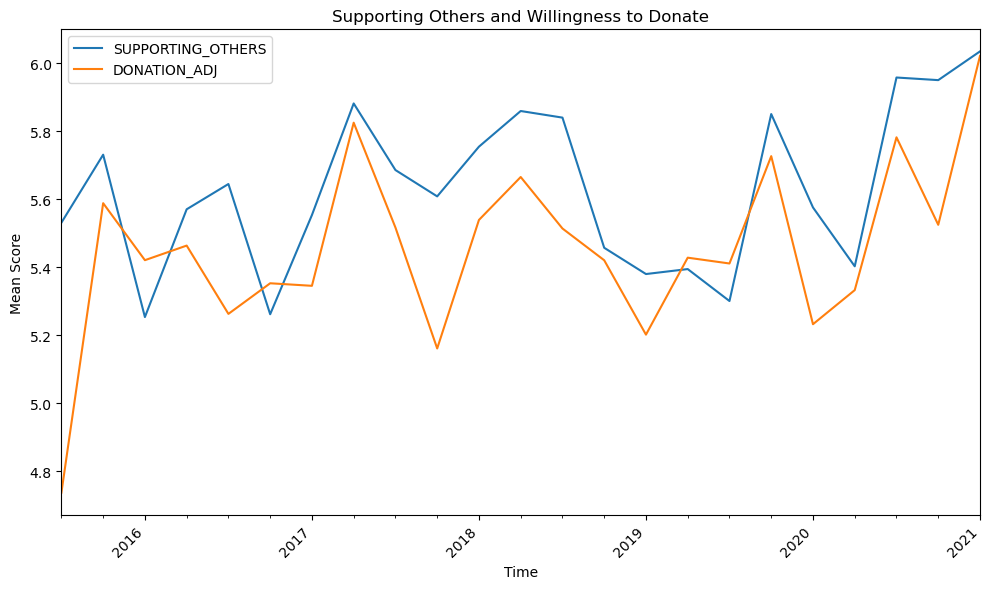

In [21]:
# Shows almost a 1 to 1 relationship with supporting others and donations meaning that people who submitted that they 
# are more likely to support others are also more likely to donate more frequently throughout the year. 
mean_scores_over_time_6.plot(kind='line', figsize=(10, 6))
years = mean_scores_over_time.index.year
plt.title('Supporting Others and Willingness to Donate')
plt.ylabel('Mean Score')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [22]:
# Is there any correlation between Achievement, Personal Awards, To-do Completed, and Work-Life Balance?
df_11 = wellness_df[["Timestamp", "TODO_COMPLETED", "ACHIEVEMENT", "PERSONAL_AWARDS", "WORK_LIFE_BALANCE_SCORE"]]
df_11

,Timestamp,TODO_COMPLETED,ACHIEVEMENT,PERSONAL_AWARDS,WORK_LIFE_BALANCE_SCORE
0,2015-07-07 00:00:00,6,2,4,609.5
1,2015-07-07 00:00:00,5,5,3,655.6
2,2015-07-07 00:00:00,2,3,4,631.6
3,2015-07-07 00:00:00,3,2,5,622.7
4,2015-07-07 00:00:00,5,2,8,663.9
...,...,...,...,...,...
15966,2021-03-14 05:42:00,8,0,5,644.5
15967,2021-03-14 06:30:00,7,6,10,714.9
15968,2021-03-14 08:35:00,7,6,10,716.6
15969,2021-03-14 08:43:00,6,3,1,682.0


In [23]:
ach_awards_df = df_11[["Timestamp", "ACHIEVEMENT", "PERSONAL_AWARDS"]]
ach_awards_df

,Timestamp,ACHIEVEMENT,PERSONAL_AWARDS
0,2015-07-07 00:00:00,2,4
1,2015-07-07 00:00:00,5,3
2,2015-07-07 00:00:00,3,4
3,2015-07-07 00:00:00,2,5
4,2015-07-07 00:00:00,2,8
...,...,...,...
15966,2021-03-14 05:42:00,0,5
15967,2021-03-14 06:30:00,6,10
15968,2021-03-14 08:35:00,6,10
15969,2021-03-14 08:43:00,3,1


In [24]:
ach_awards_df = ach_awards_df.set_index("Timestamp")
ach_awards_df

,ACHIEVEMENT,PERSONAL_AWARDS
Timestamp,,
2015-07-07 00:00:00,2,4
2015-07-07 00:00:00,5,3
2015-07-07 00:00:00,3,4
2015-07-07 00:00:00,2,5
2015-07-07 00:00:00,2,8
...,...,...
2021-03-14 05:42:00,0,5
2021-03-14 06:30:00,6,10
2021-03-14 08:35:00,6,10


In [25]:
mean_scores_over_time_11 = ach_awards_df.resample('Y')[["ACHIEVEMENT", "PERSONAL_AWARDS"]].mean()
mean_scores_over_time_11

,ACHIEVEMENT,PERSONAL_AWARDS
Timestamp,,
2015-12-31,4.097367,5.969697
2016-12-31,3.855168,5.597656
2017-12-31,3.946912,5.709281
2018-12-31,4.053747,5.789664
2019-12-31,3.893381,5.515771
2020-12-31,4.144068,5.748487
2021-12-31,4.280323,5.789757


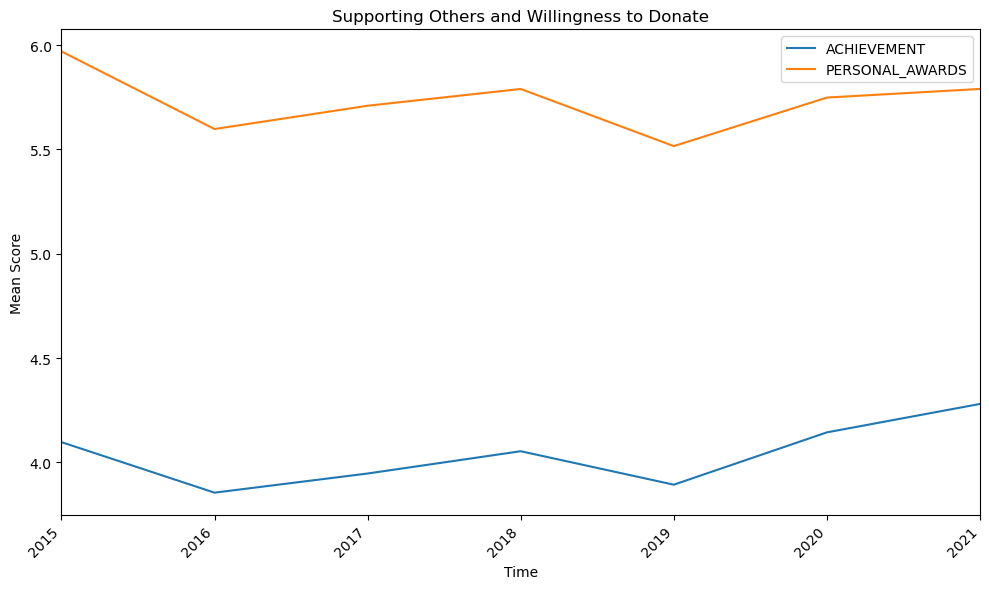

In [26]:
mean_scores_over_time_11.plot(kind='line', figsize=(10, 6))
years = mean_scores_over_time.index.year
plt.title('Supporting Others and Willingness to Donate')
plt.ylabel('Mean Score')
plt.xlabel('Time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
import seaborn as sns 

In [28]:
df_11_2 = df_11.drop(columns={"Timestamp"})
df_11_2

,TODO_COMPLETED,ACHIEVEMENT,PERSONAL_AWARDS,WORK_LIFE_BALANCE_SCORE
0,6,2,4,609.5
1,5,5,3,655.6
2,2,3,4,631.6
3,3,2,5,622.7
4,5,2,8,663.9
...,...,...,...,...
15966,8,0,5,644.5
15967,7,6,10,714.9
15968,7,6,10,716.6
15969,6,3,1,682.0


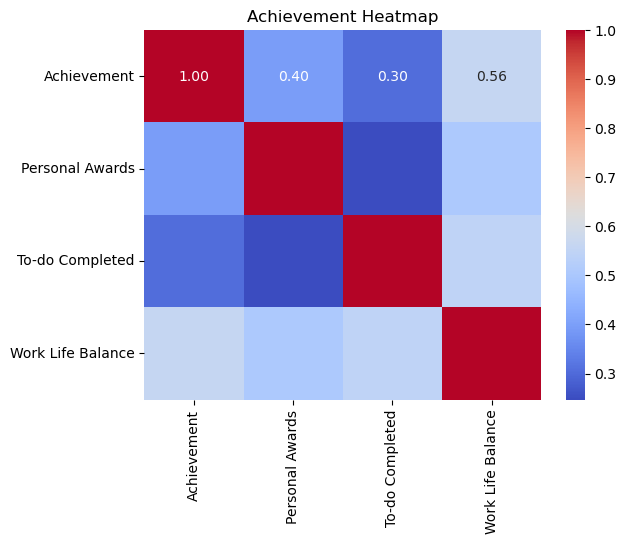

In [29]:
df_normalized = (df_11_2 - df_11_2.min()) / (df_11_2.max() - df_11_2.min())

combined_df_11 = pd.DataFrame({
    'Achievement': df_normalized['ACHIEVEMENT'],
    'Personal Awards': df_normalized['PERSONAL_AWARDS'],
    'To-do Completed': df_normalized['TODO_COMPLETED'],
    'Work Life Balance': df_normalized['WORK_LIFE_BALANCE_SCORE']
})

correlation_matrix = combined_df_11.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Achievement Heatmap')
plt.show()

In [ ]:
# We had 4 survey questions pertaining to Achievement, Personal Awards, To-do Completed, and Work-Life Balance.
# We wanted to see if any of these were correlated with one another to see if for instance, frequently checking off your weekly
# to-do list had any correlation with how many remarkable achievements you are proud of. 
# We were surprised to see that there was only a 30% correlation between the two. The highest 
# correlation was actually between work-life balance and achievement with a 56% correlation.
# This says to me that a healthy work-life balance would lead to more achievements in someone's lifetime. Should note that
# achievements doesn't just pertain to work but also could be achievements outside of work as well. 